# Assignment - PART 2 due Jan 27 - Gradient Descent

The goal of this assignment is to write code that does gradient descent for linear regression. Here are the parts

- Q1 Warm Up
- Paste in your code from last time and rerun it to store the variables
- Q2 Write a function that does gradient descent
- Q3 Use linear regretion to predict Life Expectancy - new data set!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

## Question 1 - Warm Up

- Write code that creates a 100 x 2 matrix filled with random floats between 0-100 and prints the last 10 rows
- Make a scatter plot of the data that you just created.
- Find the average values of each of the columns.
- Make a scatter plot of the data where you plot values of y<50 in red and y>=50 in blue

In [2]:
# Fill a 100 X 2 np.array with random numbers (floats) and print the last 10 rows
array=[]
for i in range(100): 
    random1=int(random.random()*100) # random int between 0 and 100
    random2=int(random.random()*100)
    row=np.array([random1,random2]) # turn the list into a row vector with 2 cols
    array.append(row) # adds each row to the array
    
matrix= np.array(array) # turns the array var into a matrix 
print(matrix[-10:]) # print the last 10 rows

[[73 43]
 [ 4 30]
 [57 74]
 [59 77]
 [ 2 24]
 [26 21]
 [97 83]
 [36 57]
 [77 57]
 [29 87]]


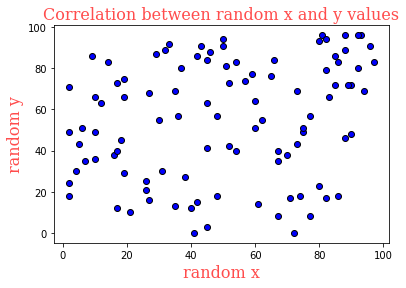

In [3]:
# Make a scatter plot of the random data where x is the first column and y is the second column of your random data

'''
A Font Dictionary to be passed into lables or headings for styling purposes 
'''
font = {'family': 'serif',  
        'color':  '#ff4d4d',
        'weight': 'normal',
        'size': 16,
        }

# Scatter plot 
x=matrix[:,0] # all the rows of the first col
y=matrix[:,1]  # all the rows of the second col
plt.scatter(x,y ,marker='o', c='b', edgecolor='black') # scatter plot x and y vals 
plt.title('Correlation between random x and y values',fontdict=font) # makes the title 
plt.xlabel('random x',fontdict=font)  # x axis label
plt.ylabel('random y',fontdict=font) # y axis label

plt.show()

In [4]:
# Find the average values of each of the columns in your random data

print(f'The mean of the x col is {np.mean(x)} \n')
print(f'The mean of the y col is {np.mean(y)}')

The mean of the x col is 50.3 

The mean of the y col is 54.76


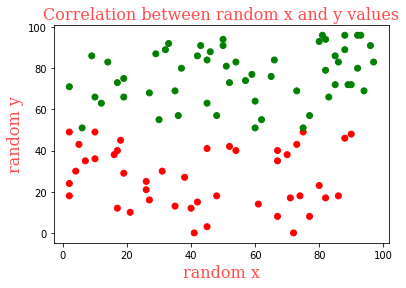

In [5]:
# Make a plot of your data such that if the y-value is less than 50 the color is red 
# and more than or equal to 50 the color is green


'''
A Font Dictionary to be passed into labels' or headings for styling purposes 
'''
font = {'family': 'serif',  
        'color':  '#ff4d4d',
        'weight': 'normal',
        'size': 16,
        }


# Scatter plot 
x=matrix[:,0] # all the rows of the first col
y=matrix[:,1]  # all the rows of the second col

# Function to map the colors as a list from the input list of x variables

cols=[]
for i in range(len(y)):
    if y[i]<50:
        cols.append('red')
    else:
        cols.append('green')
# Create the colors list using the function above



plt.scatter(x,y ,marker='o', c=cols) # scatter plot x and y values according to their color array
plt.title('Correlation between random x and y values',fontdict=font) # makes the title 
plt.xlabel('random x',fontdict=font)  # x axis label
plt.ylabel('random y',fontdict=font) # y axis label

plt.show()

## CODE FROM LAST TIME - copy and paste from last assignment (all code)

# Assignment due Jan 22 - Linear Regression

The goal of this assignment is to explore a data set and then preform linear regression on that data. Here are the parts

- Q1 Warm Up
- Q2 Import the Data (population vs. profit) and Create a Scatter Plot
- Q3 Find information about your data: Max of each feature, Min of each feature, number of samples. Then create two numpy column vectors. One that contains population the other profit.
- Q4 Write a function that calculates the mean squared error cost function
- Q5 Create a surface plot the graphs the cost function for a range of values
- Q6 Using the Normal Equation to minimize the cost function, find the line of best fit
- Q7 Make a plot that shows the original scatter plot of the data and the line that you just created
- Q8 Write a function that uses your linear regression formula to make predictions. Given the population of the city predict what the company profits are.

Data for this assignment originally comes from: https://www.coursera.org/learn/machine-learning

## Question 1 - Warm Up

- Write code that creates a 5x5 identiy matrix using numpy and then changes the entries along the diagonal to be the numbers 1-5.
- Create a python function that reads in an existing dataframe, a name, birth month, and favorite animal and appends this to the existing dataframe.
- Use your function to create a dataframe that contains 5 entries

In [6]:
# Matrix with 1-5 along diagonal
identity =np.eye(5) # create a 5x5 identity 
v1=np.array([1,2,3,4,5]) # create a row vector 1-5
new = identity*v1.T # broadcast the transposed v1 onto identity 
print(new)

def data_funk(name,birth_month,fav_animal,dataframe):
    
    obj= { # creates a dictionary for the new entry 
        'Name':name,
        'Month':birth_month,
        'Animal':fav_animal
    }
    
    new_series = pd.Series(obj)  # turn the dictionary into a series  
    new_df=dataframe.append(new_series, ignore_index=True)  # append the series to the new data frame 
    
    return new_df
    

    

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]


In [7]:
# Function to append dataframe
mydata = pd.DataFrame([{'Name':'Joanna','Month':'Feb','Animal':'Otter'},{'Name':'Tamara','Month':'Nov','Animal':'Cat'}])


In [8]:
# Use your function

mydata=data_funk('Raff','March','Doggos',mydata)
mydata=data_funk('Anooj','September','Honey badger',mydata)
mydata=data_funk('Shlok','April','Sloths',mydata)
print(mydata)

     Name      Month        Animal
0  Joanna        Feb         Otter
1  Tamara        Nov           Cat
2    Raff      March        Doggos
3   Anooj  September  Honey badger
4   Shlok      April        Sloths


## Question 2 - Import and Explore the Data

The data for this assignment can be found at

URL = http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt

this data is in csv format. It contains data that matches the population of a city (units = tens of thousands) with the profit that a company makes (units = tens of thousands).

In [9]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df = pd.read_csv(
    filepath_or_buffer= URL, 
    header=None, 
    sep=',')

df.columns=['Population', 'Profit']  # column names for the data frame
df.dropna(how="all", inplace=True) # drops the empty line at file-end


# Print out the first few rows of the data frame:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


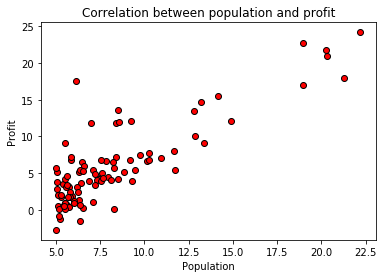

In [10]:
# Create a Scatter Plot with labeled axis that plots Population (x) vs Profit (y). Create a fun title for this plot.
x= df['Population'] # Population (x)
y = df['Profit'] # Profit (y)
plt.scatter(x,y ,marker='o', c='red', edgecolor='black') # creates the scatter plot 
plt.title('Correlation between population and profit') # makes the title 
plt.xlabel('Population')  # x axis label
plt.ylabel('Profit') # y axis label
plt.show() # shows the plot 

Does it appear at least plausable that this relationship can be described using linear regression (a straight line)?

It does seem as though the data is seemingly linear even though there are a few outliers 

In [11]:
# Prep your data for machine learning by creating two numpy column vectors
# One should contain x=population the other y=profit

x_vec = np.array(x).reshape(-1,1) # create col vector of the population
y_vec = np.array(y).reshape(-1,1) # creates col vector of the profit 


In [12]:
# Append your x data to add a column of ones
ones = np.ones_like(x_vec).reshape(-1,1) # creates a column of ones in the shape of x vector
X = np.hstack((ones,x_vec)) # appends the x data to the col of ones 
print(X[:10])

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]


In [13]:
# Check that the arrays are the correct shape
print(X.shape) # 97 rows and 2 cols. correct shape.

(97, 2)


## Question 3 - Cost Function

Create a python function that reads in the vectors x and y, some parameter values theta, and the number of samples. It should return the value of the mean squared error cost function.

Test your code using our data a initial guess theta=[0,0]

NOTE: You should get The cost function value: 32.072733877455676

In [14]:
# Compute_Cost function here

def mse_function(X,Y, theta):# x = population with ones appended 
    m=len(X) # the sample size 
    #print(theta.shape)
    x_theta=np.matmul(X,theta) # h of theta matrix (97 x 1)
    #print(x_theta.shape)
    p1= np.subtract(x_theta,Y) # X (matrix)*theta(vector) - Y(vector)
    
    J = (1/2)/m *(np.matmul(p1.T,p1)) # the cost function equation
    return J
        

In [15]:
# Test your cost function here
theta= np.array([0,0]).reshape(-1,1) # need to reshape for vec to be 2x1
print(mse_function(X,y_vec,theta))

[[32.07273388]]


In the test of your cost function above you assumed that (theta1,theta2) = (0,0).
What line does this represent in your scatter plot of the data? 
Would (theta1,theta2) = (0,0) give a very good prediction?

 In the example above, theta of 0,0 assumes the best fit line should be on the x axis.
 This does not give a very good representation of the data.

## Question 4 - Plot the Cost Function

Here are some hints:

- create two np.arrays that contain a range of theta values
-- theta1 = [-10,10] with about 50 data points
-- theta2 = [-1, 4] with about 50 data points

- run these arrays through your python cost function to generate J values

- now you have (theta1,theta2,J) points. Use these points in plot_surface to get a nice looking curve.

In [16]:
# Code to generate J values
# HINT: use np.arange
theta1=np.arange(-10,10,.4) # start , stop , step (stepping by .4 to get 50 vals
theta2=np.arange(-1,4,.1) # .1 stepping to get 50 vals 

j_values =np.zeros((50,50)) # array to hold the 50x50 J vals 

for i in range(50): # to run through theta 1's values 
    for j in range(50):
        t = np.array([theta1[i],theta2[j]]).reshape(-1,1) # col vec of each theta 1 and theta 2
        j_values[i,j]=mse_function(X,y_vec,t) # populates the J values from the cost function


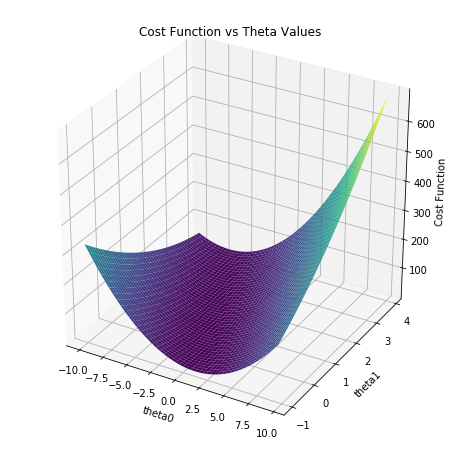

In [17]:
# Code to create a surface plot
from mpl_toolkits import mplot3d

# Plot theta0, theta1, cost
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")

theta0vals, theta1vals = np.meshgrid(theta1, theta2)  # make the grid

p = ax.plot_surface(theta0vals, theta1vals, j_values, cmap='viridis', edgecolor='none')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost Function')
plt.title("Cost Function vs Theta Values")

plt.savefig('plot3.png', format='png')  # save file as plot3.png
plt.show()

Does the surface plot appear to have a clear global minimum?

The minimum seems to be between -5 and 5 for theta0 and between -1 and 3 for theta1 but there is no clear global min.

## Question 5 - The Normal Equation

Use the Normal Equation developed in class to minimize the cost function. This should result in a theta1 and theta2 that can generate the line of best fit.

In [18]:
# Normal Equation Calculation

# Find the theta's that minimize the cost using the normal equation
tmp1 = np.linalg.inv(np.matmul(X.T,X)) # inverse of {x(matrix) transpose} mult by x 
tmp2 = np.matmul(X.T,y) # transposed x matrix 

theta = np.matmul(tmp1,tmp2)
print(theta)

[-3.89578088  1.19303364]


## Question 6 - Create a Plot of the Data and the Linear Regression Line

Make a plot that shows the original scatter plot data, with nice lables, and then overlays the liner function that best fits the data.

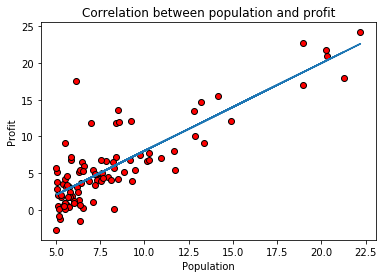

In [19]:
# Make plot

# Plot the line and the linear fit to see if they seem reasonable

# Scatter plot original data 
plt.scatter(x,y ,marker='o', c='red', edgecolor='black') # scatter plot x and y vals 
plt.title('Correlation between population and profit') # makes the title 
plt.xlabel('Population')  # x axis label
plt.ylabel('Profit') # y axis label

lin_reg = np.matmul(X,theta)  # this is the y values that correspond to the best fit line. Big X - array with ones attatched

plt.plot(x,lin_reg)  # plot of original x values for population vs best fit y values for profit 

plt.show()

How did you do? Does the line seem to match the data well?

The line does seem to match the data quite well 

## Question 7 - Use your ML Algorithm to Make Predictions

Now write a function that takes as an input the (theta1, theta2) values and the Popation and outputs a prediction for what the profit will be.

Test your code for the following values:

Population = 3.5

Population = 7

In [20]:
# Function that takes population as an input and predicts profit

def prediction(thetas, population):
    """
    This function calculates the single variable linear function given by
    population - the input value, population of the area.
    thetas = (theta0,theta1) - where theta0 is the intercept and theta1 is the slope
    """
    y = thetas[0]+thetas[1]*population
    return y

In [21]:
# Test the function
print(f'Prediction for 7.0: {prediction(theta,7.0)}')
print(f'Prediction for 3.5: {prediction(theta,3.5)}')

Prediction for 7.0: 4.455454631015279
Prediction for 3.5: 0.2798368763516841


## Question 2 - Gradient Descent

 - Write a python function that implements the gradient descent algorithm for the data set above.
 - Use your function to find the theta values that minimize the cost: You can initialize with theta = [0,0], 1500 iterations, and alpha = 0.01

NOTE - if you are thinking ahead you might try to make this algorithm completely generally so that it works even if you have more or fewer features in your data set.

In [22]:
j_values=np.zeros(1500) # to store the cost of each theta choice

# Your gradient descent function here:
def gradientDescent(x, y, theta, alpha, iterations): 
    m=len(x) # the sample size or number of data points or observations in your training data
    """
    This function reads in:
        the feature matrix X (97x2)
        the y values - target (97x1 col vector)
        the initial theta values (guess) (2x1 col vector)
        the step size parameter alpha 
        the number of iterations you want to run
        and the number of data points or observations in your training data
    """
    # your code here
    
    """inputs x-feature matrix, y-target vector, 
    current theta and outputs the 'cost' of that theta """
    
    theta_old=theta # initialize to the original theta guess 
    for i in range (iterations):
        x_theta=np.dot(x,theta_old) # h of theta matrix (97 x 1)
        p1= np.subtract(x_theta,y) # X (matrix)*theta(vector) - Y(vector)
        p2 = x.T.dot(p1) # X transpose dot p1 ie: [x*theta old - y vec]
        theta_new = theta_old - (alpha/m)*(p2)
        theta_old=theta_new  # change the theta old to be used in the calc each time 
        j_values[i]=(mse_function(x,y,theta_new))
        
    Jnew = j_values[-1]        
            
    return theta_new, Jnew

# gradient descent parameters:
    # I suggest you use:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01


# gradient descent results
theta = gradientDescent(X, y_vec , theta, alpha, iterations)
print(f"Final Theta values\n{theta}")

Final Theta values
(array([[-3.63029144],
       [ 1.16636235]]), 4.483388256587726)


How did your gradient descent do compared with the Normal Equation? They should be pretty close. If you do more itterations it will get closer.

My normal equation generated theta values of [-3.89578088  1.19303364] whereas my gradient desc function generated theta values of 
[-3.62981201, 1.16631419]]. I would therefore say that the gradient descent compared equally to the normal equation.

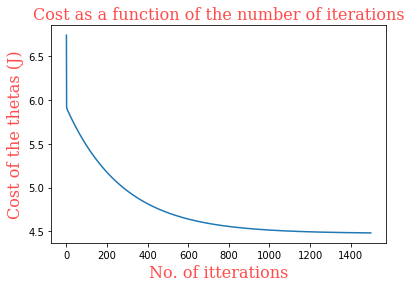

In [23]:
# Plot the Cost as a function of the number of iterations
x_vals = []
for x in range(iterations):
    x_vals.append(x)
    
plt.plot(x_vals,j_values)
plt.title('Cost as a function of the number of iterations' , fontdict=font)
plt.xlabel('No. of itterations', fontdict=font)
plt.ylabel('Cost of the thetas (J)', fontdict=font)
plt.show()

## Question 3 - Full Linear Regression Analysis

Complete a full linear regression analysis on the data set imported below. You should:

- import and explore the data - see information below about the seaborn package
- reduce the number of features to just the most important ones 
- do a linear regression with your gradient descent algorithm on the data to predict the life expectancy as a function of features.

- use your regression variables to predict the life expectancy for a new variable

NOTE: We are still skipping an important idea of validation or crossvalidation. At this point in class we are just assuming that the training went well and we are using the algorithm. NEVER do this in the real world!!!

In [24]:
# Import the data
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData.csv'

df = pd.read_csv(URL)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### About the Data

From: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors. 

### Columns:

Country

Year

Status

Developed or Developing status

Life expectancy
Life Expectancy in age

Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

Infant deaths
Number of Infant Deaths per 1000 population

Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles
Measles - number of reported cases per 1000 population

BMI
Average Body Mass Index of entire population

Under-five deaths
Number of under-five deaths per 1000 population

Polio
Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure
General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS
Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP
Gross Domestic Product per capita (in USD)

Population
Population of the country

Thinness 1-19 years
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Thinness 5-9 years
Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling
Number of years of Schooling(years) 

In [25]:
# Use pandas to explore (describe) the stats of the data: max, min, mean, std, quarties

### Seaborn is a python package for data visualization. Below are a few fun commands.

documentation: https://seaborn.pydata.org/

In [26]:
# You should be able to just run this cell!! Assumes df contains the full data set

import seaborn as sns

# Delete the columns in the data frame that contain strings
df.drop('Country', axis=1, inplace=True) # drops the country attribute 
df.drop('Year', axis=1, inplace=True) # drops the year attribute 
df.drop('Status', axis=1, inplace=True) # drops the status 

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(18,9)})
#sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# This should plot a heat map of correlation constants. The larger the magnitude the bigger the correlation.

In [27]:
# You should just be able to run this cell!!

# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots
#sns.pairplot(df,size=2.5)

# This should plot a different scatter plot for each pair of variables

##### At this point you should be looking at the correlation and pairwise plots and looking for things like highly correlated features, features corelated with your target output, outliers, etc. You are trying to think about selecting which features are most important, which features are most important. This is a bit overwhelming, but part of the job.

In [28]:
# Now it's your turn!!!

# Create a new data frame from the old that keeps just 3-5 "important features" YOUR CHOICE!
# Good features for linear regression would be ones that are highly correlated (positive or negative) 
# to your target output and seem to have a linear scatter plot when graphed against your target output.
# in our case the target output is Life Expectancy!

# This is more of an art than a science! If you are really interested in a more solid foundataion for this 
# TAKE MORE STATISTICS

# Delete the columns in the data frame that are unneccesary 
y_vector = np.array(df['Life expectancy '])
y_vector=y_vector.reshape(-1,1)
df.drop(['Life expectancy ',
 'Infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 'BMI',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years'], axis=1, inplace=True) # drops the unwanted attributes
 

print(y_vector.shape)
list(df.columns) # should have just HIV/AIDS, shooling, adult mortality and income composition

(1649, 1)


['Adult Mortality', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

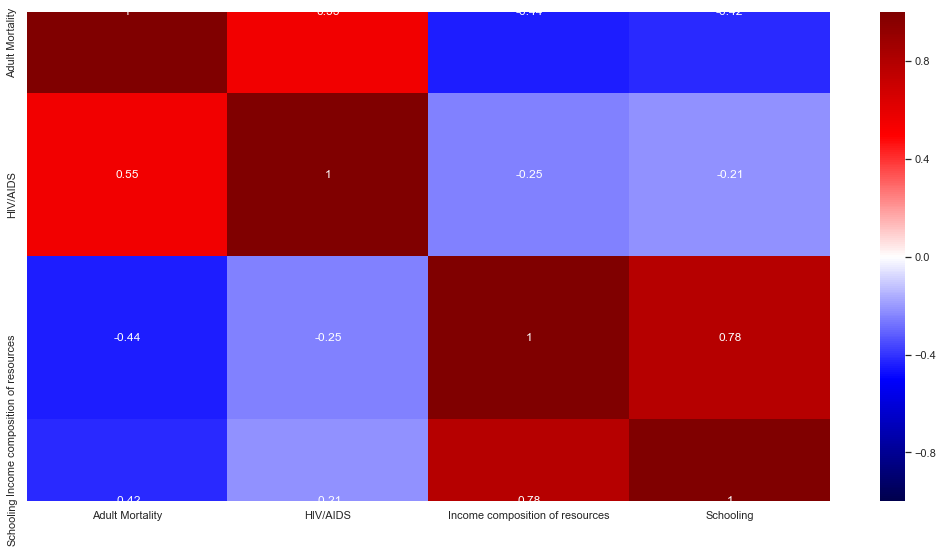

In [29]:
# Visualize the correlation with Seaborn for your reduced number of features data set
# it helps to make the figure size bigger

sns.set(rc={'figure.figsize':(18,9)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


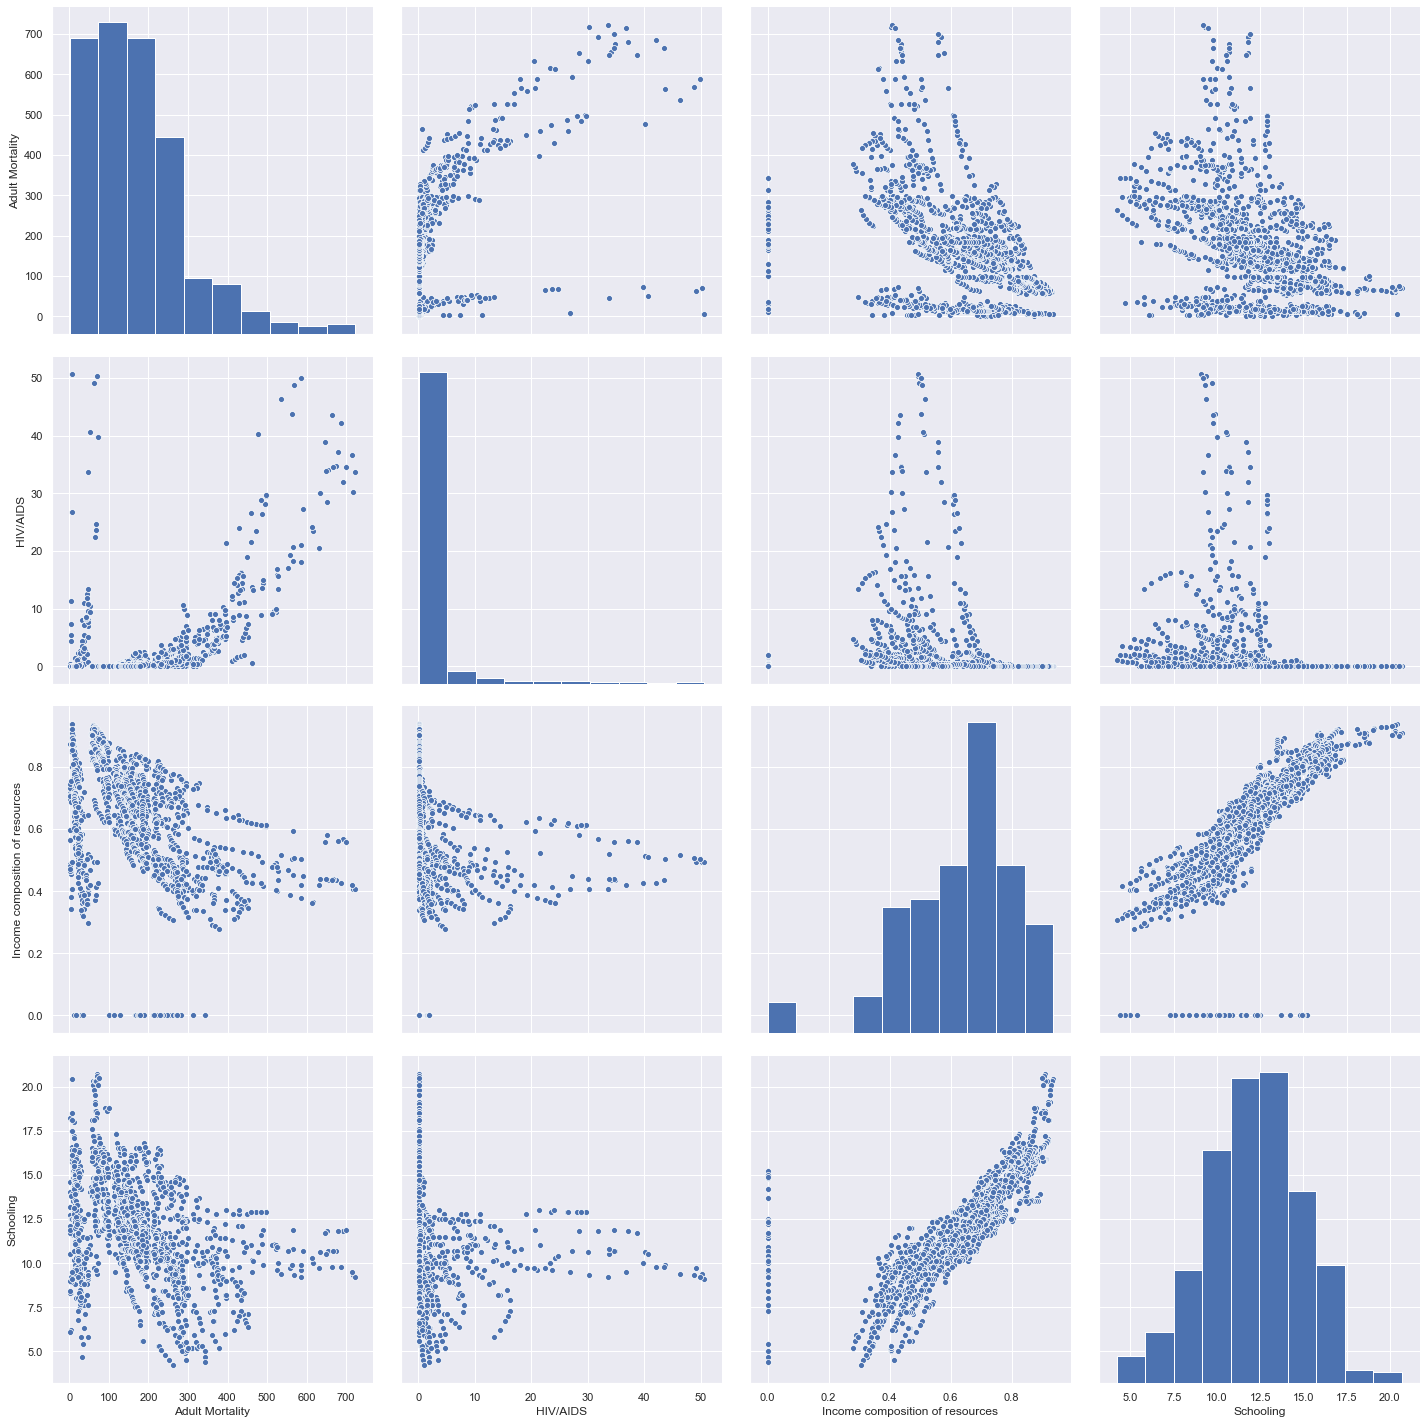

In [30]:
# Plot all of the variable-to-variable relations as scatterplots for your reduced data set

sns.pairplot(df,size=5) #pairplot of the new dataframe

In [31]:
# In this case we need to normalize our features. 
# This means, use "some method" to scale all the features so their magnitudes are closer to the range [-1,1]
# This is not unique, there are lots of ways to do this - you can choose your own method




# Find the scaling values for each column
# Always save your scaling parameters - you will need them when you use your model!!!



# Then scale/normalize the data
fmin=[]
fmax=[]
i=0
for n in (list(df)):
    fmin.append(np.min(df[n],axis=0))  # returns the min in the col 
    fmax.append(np.max(df[n],axis=0))  # returns the max in the col 
    
    df[n] = (df[n]-fmin[i])/(fmax[i] - fmin[i]) # uses broadcasting so no for loops are needed
    i+=1
        
#create ones column same length as the feature matrix 
ones = np.ones_like(df['Adult Mortality']).reshape(-1,1)
# Then create X
x=np.array(df).reshape(-1,4)
X = np.hstack((ones, x))

# Check the shape of your normalized data
print(X.shape)

print(X[:5])  # HIV column appears to beonly zeros however the last values have normalized values
print(X[-5:])

(1649, 5)
[[1.         0.36288089 0.         0.51175214 0.35757576]
 [1.         0.37396122 0.         0.50854701 0.35151515]
 [1.         0.36980609 0.         0.50213675 0.34545455]
 [1.         0.37534626 0.         0.49465812 0.33939394]
 [1.         0.37950139 0.         0.48504274 0.32121212]]
[[1.         1.         0.66336634 0.43482906 0.3030303 ]
 [1.         0.98891967 0.72475248 0.4465812  0.32121212]
 [1.         0.09972299 0.78613861 0.45619658 0.35151515]
 [1.         0.94875346 0.83168317 0.45619658 0.33939394]
 [1.         0.91966759 0.85940594 0.46367521 0.33939394]]


In [32]:
# Create numpy arrays for your features X and your targets y
# Don't forget that first column of ones!
# Always check the shape of your data!

print(X.shape)
print(y_vector.shape)


(1649, 5)
(1649, 1)


In [33]:
# Use gradient descent to find theta values
# Gradient descent parameters:
theta = np.zeros((5, 1))
iterations = 1500
alpha = 0.01

# Do gradient descent to find theta - you should be able to use your gradient descent function
theta, jnew =gradientDescent(X,y_vector,theta,alpha,iterations)

print("Final Theta values")
print(theta)
print(f'cost = {jnew}')
# Sanity check - What shape should theta be???
# shape should be 5x1 

Final Theta values
[[42.26232617]
 [ 1.28858527]
 [-4.666328  ]
 [25.9348103 ]
 [19.19105455]]
cost = 15.678673392427962


### Now import the test data and make predictions - see how well you did using your cost function
 
 NOTE - you can compare your results with your friends - Smaller Cost Fuction WINS!!!

In [34]:
# This is a random subset of the data that was used in training.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData_TestingData.csv'

df_test = pd.read_csv(URL)
df_test.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Zambia,2006,Developing,58.0,526,33,2.25,1.860004,81.0,459,...,83,6.11,81,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9
1,Saint Vincent and the Grenadines,2001,Developing,79.0,186,0,4.73,0.000000,NaN,0,...,99,3.64,99,0.7,NaN,NaN,3.9,3.9,0.673,12.8
2,Sudan,2015,Developing,64.1,225,58,NaN,0.000000,93.0,3585,...,93,NaN,93,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
3,Kiribati,2008,Developing,65.1,21,0,0.46,167.620155,83.0,0,...,74,12.23,82,0.1,1413.323400,9844.0,0.2,0.1,0.572,11.6
4,Samoa,2000,Developing,72.0,18,0,3.00,21.254300,89.0,0,...,94,5.31,95,0.1,154.689230,17461.0,0.2,0.2,0.640,12.1


In [35]:
# Select just the features you used and the target output in x and y


''' have to attain y beforer deleting the unneeded cols and drop NA's after '''

df_test.drop(
  ['Infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 'BMI',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
  'Country',
  'Year',
  'Status'], axis=1, inplace=True) # drops the unwanted features as well as strings 

df_test.dropna(inplace=True) # have to drop NA's for the X matrix and Y vec together 

y_test = np.array(df_test['Life expectancy ']).reshape(-1,1) # grab the life expectancy column
df_test.drop('Life expectancy ', axis=1, inplace=True)  # now remove y vec from the x matrix 

# Normalize the test data the same way you did above - use the same scale parameters
# Then scale/normalize the data
i=0
for n in (list(df_test)): # loop through each row 
    # use the same f min and fmax from the training data
    df_test[n] = (df_test[n]-fmin[i])/(fmax[i] - fmin[i]) # uses broadcasting so no for loops are needed
    i+=1

# Create your xtest matrix and ytest vector

#create ones column same length as the feature matrix 
ones = np.ones_like(df_test['Adult Mortality']).reshape(-1,1)
# Then create X_test
x=np.array(df_test).reshape(-1,4) # x matrix  without ones 
X_test = np.hstack((ones, x))  # h theta matrix with ones col 

# Check the shape of your normalized data
print(X_test.shape)
print(y_test .shape)

print(X_test[:5])  # HIV column appears to beonly zeros however the last values have normalized values
print(X_test[-5:])
print(y_test)


(27, 5)
(27, 1)
[[1.         0.72714681 0.31287129 0.51175214 0.40606061]
 [1.         0.25623269 0.01188119 0.71901709 0.52121212]
 [1.         0.31024931 0.0039604  0.52136752 0.18181818]
 [1.         0.02770083 0.         0.61111111 0.44848485]
 [1.         0.02354571 0.         0.68376068 0.47878788]]
[[1.         0.1066482  0.         0.93803419 0.76363636]
 [1.         0.32271468 0.00990099 0.46474359 0.25454545]
 [1.         0.00138504 0.         0.52029915 0.11515152]
 [1.         0.10526316 0.         0.88888889 0.55151515]
 [1.         0.89473684 0.76633663 0.59722222 0.45454545]]
[[58. ]
 [79. ]
 [64.1]
 [65.1]
 [72. ]
 [54.7]
 [69. ]
 [75.4]
 [76.5]
 [47.7]
 [72.4]
 [74.7]
 [58.6]
 [73. ]
 [68.5]
 [73.4]
 [73.5]
 [73.3]
 [54.8]
 [64.7]
 [76.8]
 [75. ]
 [85. ]
 [64.2]
 [62.9]
 [76.9]
 [47.8]]


In [36]:
# Calculate the cost function using the test values
# You already wrote this function in PART1
 
print(mse_function(X_test,y_test,theta))

[[16.15212513]]


In [37]:
print(theta)

[[42.26232617]
 [ 1.28858527]
 [-4.666328  ]
 [25.9348103 ]
 [19.19105455]]


In [42]:
# Write a function that will make predictions for you
def predict_GDP(x,theta):
    # Your code here
    y = np.matmul(x,theta)
    return y

xstar_test=X_test
ypred_scaled = predict_GDP(xstar_test,theta)
average = np.average(ypred_scaled)
print(ypred_scaled)
print(average)

[[62.80428263]
 [71.18724451]
 [59.65447876]
 [66.75396899]
 [69.21431475]
 [60.66259155]
 [53.34735327]
 [71.4538993 ]
 [77.33728031]
 [45.93833047]
 [73.87984379]
 [71.79836594]
 [58.21200334]
 [66.14386631]
 [70.05748325]
 [73.41351299]
 [71.22139143]
 [69.46799075]
 [61.27477216]
 [61.40102039]
 [76.9735722 ]
 [76.13746505]
 [81.38247731]
 [59.57000283]
 [57.96784956]
 [76.0352888 ]
 [64.05134445]]
66.93859241036554
[[62.80428263]
 [71.18724451]
 [59.65447876]
 [66.75396899]
 [69.21431475]
 [60.66259155]
 [53.34735327]
 [71.4538993 ]
 [77.33728031]
 [45.93833047]
 [73.87984379]
 [71.79836594]
 [58.21200334]
 [66.14386631]
 [70.05748325]
 [73.41351299]
 [71.22139143]
 [69.46799075]
 [61.27477216]
 [61.40102039]
 [76.9735722 ]
 [76.13746505]
 [81.38247731]
 [59.57000283]
 [57.96784956]
 [76.0352888 ]
 [64.05134445]]
66.93859241036554


In [39]:
# Print the difference between your predictions and the real values
difference = y_test - ypred_scaled
print(difference)

[[-4.80428263e+00]
 [ 7.81275549e+00]
 [ 4.44552124e+00]
 [-1.65396899e+00]
 [ 2.78568525e+00]
 [-5.96259155e+00]
 [ 1.56526467e+01]
 [ 3.94610070e+00]
 [-8.37280312e-01]
 [ 1.76166953e+00]
 [-1.47984379e+00]
 [ 2.90163406e+00]
 [ 3.87996663e-01]
 [ 6.85613369e+00]
 [-1.55748325e+00]
 [-1.35129924e-02]
 [ 2.27860857e+00]
 [ 3.83200925e+00]
 [-6.47477216e+00]
 [ 3.29897961e+00]
 [-1.73572201e-01]
 [-1.13746505e+00]
 [ 3.61752269e+00]
 [ 4.62999717e+00]
 [ 4.93215044e+00]
 [ 8.64711200e-01]
 [-1.62513444e+01]]


### How did you do? Who got the smallest cost value on their test data? What did you change or play around with to reduce the cost? Which predictions were the worst?

I would use another feature and change the standard deviation method to scale my data instead.